# グラフの読み込み

In [8]:
from Graphs import MakeGraph ,GraphAxis , GraphViewOptions
import pandas as pd

folder_name = "data"

make_graph = MakeGraph(folder_name=folder_name)

HartRate.csv


# HeartRate

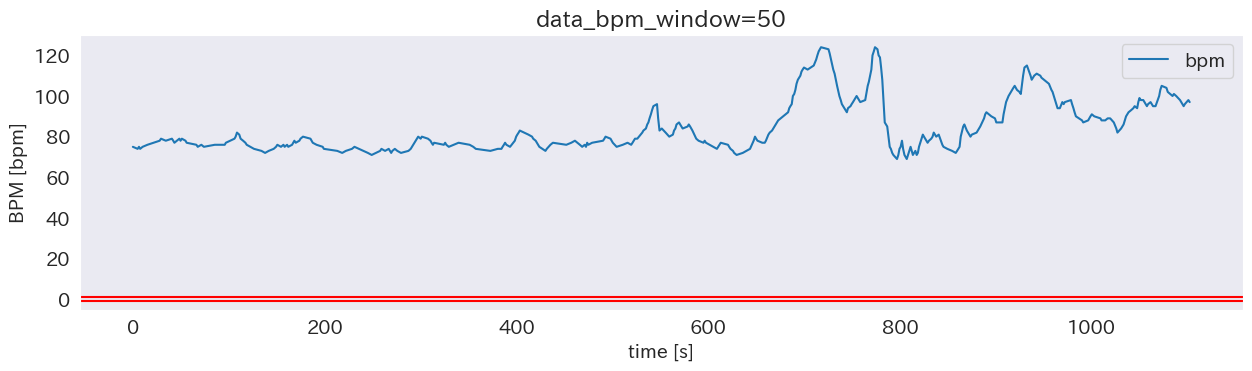

In [9]:
heart_rate_df = make_graph.heart_rate_df

# ソートをする
heart_rate_df = heart_rate_df.sort_values("time")

make_graph.plot(
    plt_lists=[
        heart_rate_df
    ],
    option=[GraphViewOptions.none],
    axis=GraphAxis.bpm,
    filter_num=50
)


# サンプリングレートの取得

In [10]:
heart_rate_df

,time,bpm
0,0.000,75
1,4.992,74
2,6.386,75
3,7.589,74
4,10.182,75
...,...,...
376,1092.188,98
375,1095.978,95
374,1097.182,96
377,1100.900,98


In [11]:
sampling_rate = heart_rate_df["time"].diff().mean()

In [12]:
sampling_rate

2.916039682539682

In [13]:
heart_rate_df_diff = heart_rate_df.copy()
heart_rate_df_diff["bpm"] = heart_rate_df_diff["bpm"].diff()
# ソートする
heart_rate_df_diff = heart_rate_df_diff.sort_values("time")
heart_rate_df_diff = make_graph.low_filter(heart_rate_df_diff, 10)
heart_rate_df_diff

,time,bpm
0,0.000,NaN
1,4.992,NaN
2,6.386,NaN
3,7.589,NaN
4,10.182,NaN
...,...,...
376,1092.188,0.3
375,1095.978,0.0
374,1097.182,-0.4
377,1100.900,-0.5


4.992 nan nan
6.386 nan nan
7.589 nan nan
10.182 nan nan
15.179 nan nan
21.578 nan nan
27.947 nan nan
29.341 nan nan
34.338 nan nan
40.72 nan 0.4
42.114 0.4 0.4
43.316 0.4 0.2
48.498 0.2 0.5
49.699 0.5 0.3
51.095 0.3 0.3
54.89 0.3 0.1
56.084 0.1 -0.1
66.266 -0.1 -0.3
67.664 -0.3 -0.3
71.452 -0.3 -0.3
74.047 -0.3 -0.3
85.428 -0.3 -0.1
91.813 -0.1 -0.3
95.801 -0.3 -0.2
97.0 -0.2 -0.2
105.982 -0.2 0.1
107.189 0.1 0.3
108.572 0.3 0.6
110.974 0.6 0.6
112.366 0.6 0.3
114.962 0.3 0.3
117.363 0.3 0.1
118.752 0.1 0.0
126.339 0.0 -0.2
134.122 -0.2 -0.4
137.912 -0.4 -0.7
141.713 -0.7 -0.7
146.894 -0.7 -0.8
149.303 -0.8 -0.6
150.687 -0.6 -0.3
154.482 -0.3 -0.3
157.072 -0.3 -0.1
158.281 -0.1 -0.1
160.867 -0.1 0.2
162.069 0.2 0.2
166.055 0.2 0.4
168.455 0.4 0.5
169.846 0.5 0.3
173.641 0.3 0.3
174.846 0.3 0.3
177.432 0.3 0.5
185.216 0.5 0.3
186.414 0.3 0.3
187.615 0.3 0.1
191.602 0.1 0.1
197.988 0.1 -0.1
199.188 -0.1 -0.4
213.167 -0.4 -0.4
218.353 -0.4 -0.6
222.142 -0.6 -0.6
228.525 -0.6 -0.6
231.12 

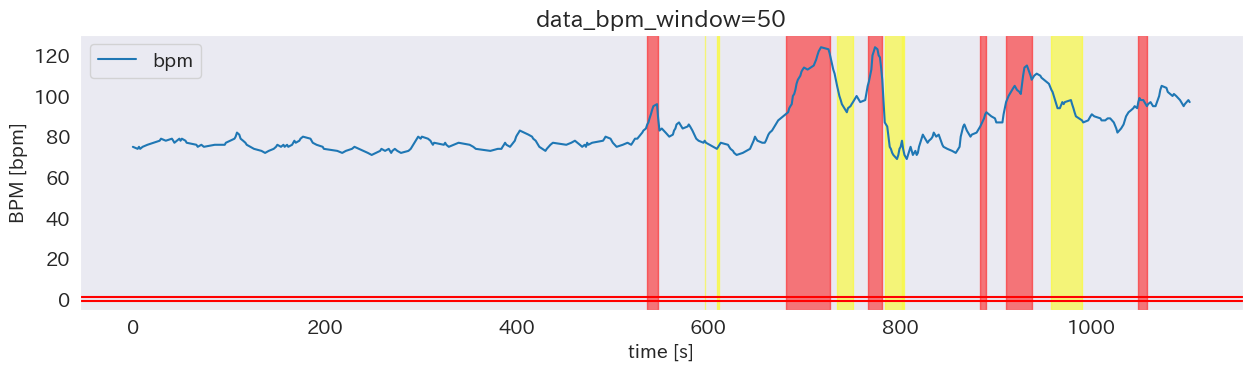

In [14]:



color_intervals = []

# 初期化
start_time = None
previous_bpm = None

for index, row in heart_rate_df_diff.iterrows():
    time = row["time"]
    bpm = row["bpm"]

    if previous_bpm is not None:
        print(time,previous_bpm, bpm)

        if previous_bpm >= 1 and bpm < 1:
            end_time = time
            color_intervals.append([start_time, end_time, "red"])
            start_time = None
            
        elif previous_bpm <= -1 and bpm > -1:
            end_time = time
            color_intervals.append([start_time, end_time, "yellow"])
            print(start_time, end_time)
            start_time = None

    if start_time is None:
        if bpm > 1:
            start_time = time
        elif bpm < -1:
            start_time = time

    previous_bpm = bpm

print(color_intervals)

color_list = pd.DataFrame(
    data=color_intervals,
    columns=["start_time","end_time","color"]
)

make_graph.plot(
    plt_lists=[
        heart_rate_df
    ],
    option=[GraphViewOptions.none],
    axis=GraphAxis.bpm,
    
    filter_num=50,
    color_list=color_list
)